In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from api_keys import gkey

In [445]:
# Read file with weather API output and create DataFrame
file = "Output/weather.csv"
df_weather = pd.read_csv(file)
df_weather[['Date', 'Time']] = df_weather['time'].str.split('T', n=1, expand=True)

observations = len(df_weather)-1

di = {'clear-day':'Clear',
      'clear-night':'Clear', 
      'cloudy':'Cloudy', 
      'fog':'Cloudy', 
      'partly-cloudy-day':'Partly Cloudy', 
      'partly-cloudy-night':'Partly Cloudy'}                   

df_weather['Weather Group'] = df_weather['icon'].map(di).fillna(df_weather['icon'].str.capitalize())

df_weather.head()


Unnamed: 0                                   Trip ID                 time  \
0           0  bc6f08423e9f194cb63a0d5ec6c6a2dea001e914  2013-11-16T01:45:00   
1           1  b2e0ede2b0d907551beda4e8b4b83c143010f63d  2016-09-28T04:45:00   
2           2  c2155aedc41a27673cd498d0fea754a18132d7f9  2013-12-10T07:15:00   
3           3  c1e860354f05150021e1bdeb7696314ca3e15608  2014-02-27T09:00:00   
4           4  bdff93a935333338e6f2f04f778ad7713a36c9ad  2016-10-31T04:15:00   

         summary  precipIntensity  precipProbability  temperature  \
0  Partly Cloudy           0.0000               0.00        43.39   
1       Overcast           0.0005               0.14        53.40   
2  Mostly Cloudy           0.0000               0.00         7.20   
3          Clear           0.0000               0.00         5.96   
4          Clear           0.0000               0.00        43.05   

   apparentTemperature  windSpeed                 icon        Date      Time  \
0                40.05       5.59  partly-cloudy-night  2013-11-16  01:45:00   
1                53.40       1.25               cloudy  2016-09-28  04:45:00   
2                -4.92       7.53    partly-cloudy-day  2013-12-10  07:15:00   
3                -5.93       7.04            clear-day  2014-02-27  09:00:00   
4                43.05       1.80          clear-night  2016-10-31  04:15:00   

   Weather Group  
0  Partly Cloudy  
1         Cloudy  
2  Partly Cloudy  
3          Clear  
4          Clear

In [446]:
df_WeatherGrouped = df_weather.groupby(['Weather Group','Date'], as_index=False).agg({'Trip ID': 'count', 'precipIntensity': 'mean', 'precipProbability': 'mean', 'temperature': 'mean', 'apparentTemperature': 'mean', 'windSpeed': 'mean'})
df_WeatherGrouped = df_WeatherGrouped.rename(columns = {'Trip ID':'Ride Count'})
df_WeatherGrouped.head()

Weather Group        Date  Ride Count  precipIntensity  precipProbability  \
0         Clear  2013-01-02           1              0.0                0.0   
1         Clear  2013-01-04           6              0.0                0.0   
2         Clear  2013-01-05           1              0.0                0.0   
3         Clear  2013-01-07           2              0.0                0.0   
4         Clear  2013-01-09           1              0.0                0.0   

   temperature  apparentTemperature  windSpeed  
0    11.490000            11.490000   2.550000  
1    17.561667             8.576667   6.521667  
2    22.900000            22.900000   2.670000  
3    21.915000            15.160000   5.065000  
4    36.650000            31.340000   6.630000

In [447]:
df_WeatherSummary = df_WeatherGrouped.groupby('Weather Group', as_index=False).mean()
df_WeatherSummary = df_WeatherSummary.rename(columns = {'Ride Count': 'Average Rides/Day'})
df_WeatherSummary


Weather Group  Average Rides/Day  precipIntensity  precipProbability  \
0          Clear           2.763966         0.000014           0.002006   
1         Cloudy           2.771812         0.000262           0.033125   
2  Partly Cloudy           2.755396         0.000069           0.007948   
3           Rain           2.430622         0.031524           0.717654   
4           Snow           2.200000         0.007181           0.492833   

   temperature  apparentTemperature  windSpeed  
0    47.673415            46.336938   2.814342  
1    43.079188            40.686337   4.234600  
2    52.059412            50.779699   3.612686  
3    55.048932            54.148455   3.932984  
4    32.954667            28.927083   5.068833

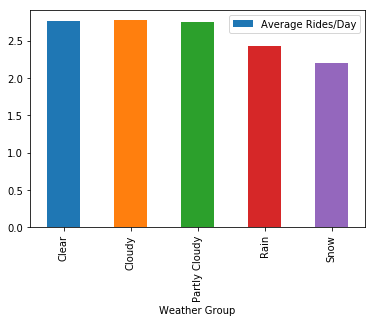

In [450]:
df_WeatherSummary.plot(kind='bar', y = 'Average Rides/Day', x = 'Weather Group')

try: os.mkdir('Images')
except: pass

plt.savefig("Images/Rides-WeatherGroups.png")


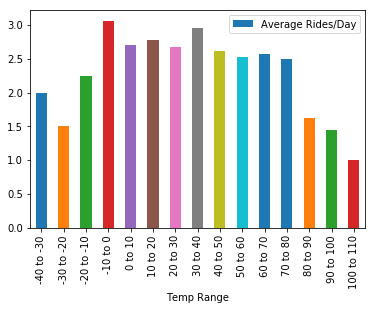

In [451]:
tbins = np.arange(int(min(df_weather['apparentTemperature'])/10-1)*10, 
                  int(max(df_weather['apparentTemperature'])/10+2)*10, 10)

# create bin labels
tbin_names = [f"{tbins[i]} to {tbins[i+1]}" for i in range(len(tbins)-1)]
    
df_TempRides = df_weather
df_TempRides['Temp Range'] = pd.cut(df_weather['apparentTemperature'], tbins, labels=tbin_names)
df_TempRides = df_TempRides.groupby(['Temp Range', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_TempRides = df_TempRides.groupby('Temp Range').mean()
df_TempRides = df_TempRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_TempRides.plot(kind='bar', y = 'Average Rides/Day')
df_TempRides

try: os.mkdir('Images')
except: pass

plt.savefig("Images/Rides-Temp.png")

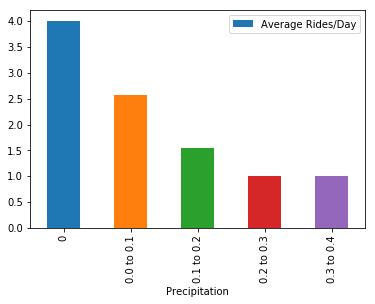

In [452]:
precipitation_bins = np.arange(int(min(df_weather['precipIntensity'])/0.1-1)*0.1, 
                               int(max(df_weather['precipIntensity'])/0.1+2)*0.1, 0.1)
# create bin labels
pr_names = [f"{precipitation_bins[i]:.2} to {precipitation_bins[i+1]:.2}" for i in range(len(precipitation_bins)-1)]
pr_names[0]=0

df_PreRides = df_weather
df_PreRides['Precipitation'] = pd.cut(df_weather['precipIntensity'], precipitation_bins, labels=pr_names)
df_PreRides = df_PreRides.groupby(['Precipitation', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_PreRides = df_PreRides.groupby('Precipitation').mean()
df_PreRides = df_PreRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_PreRides.plot(kind='bar', y = 'Average Rides/Day')
df_PreRides

try: os.mkdir('Images')
except: pass

plt.savefig("Images/Rides-Precipitation.png")

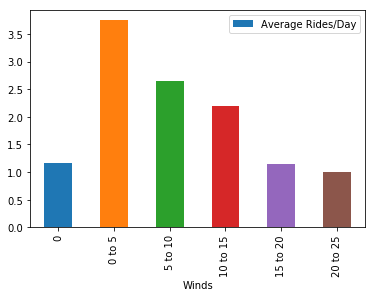

In [453]:
wind_bins = np.arange(int(min(df_weather['windSpeed'])/5-1)*5, int(max(df_weather['windSpeed'])/5+2)*5, 5)

# create bin labels
wind_names = [f"{wind_bins[i]} to {wind_bins[i+1]}" for i in range(len(wind_bins)-1)]
wind_names[0] = 0
    
df_WindRides = df_weather
df_WindRides['Winds'] = pd.cut(df_weather['windSpeed'], wind_bins, labels=wind_names)
df_WindRides = df_WindRides.groupby(['Winds', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_WindRides = df_WindRides.groupby('Winds').mean()
df_WindRides = df_WindRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_WindRides.plot(kind='bar', y = 'Average Rides/Day')
df_WindRides

try: os.mkdir('Images')
except: pass

plt.savefig("Images/Rides-Wind.png")